In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import datetime as dt

# plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

## Questions
- What is the average length (distance and time) of each taxi trip?
- How is this affected by different times of day.
- How many passengers are in each car on average?

In [3]:
taxi = pd.read_csv('data/yellow_tripdata_2018-06.csv')

In [4]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [5]:
taxi.shape

(8713831, 17)

In [6]:
print('Avg Trip Passengers: {}'.format(taxi['passenger_count'].mean()))
print('Avg Trip Distance: {}'.format(taxi['trip_distance'].mean()))

Avg Trip Passengers: 1.5975267365180712
Avg Trip Distance: 3.0084750117370853


In [7]:
taxi[['trip_distance','total_amount']].sort_values('trip_distance', ascending=False)

,trip_distance,total_amount
1532739,833.10,23.15
142767,606.00,31.55
4375539,222.96,0.31
3139184,142.00,216.32
5983592,139.16,373.30
4990020,129.21,58.56
742026,128.59,343.56
8392371,127.41,373.52
4307279,124.93,248.30
6271728,124.80,600.44


In [8]:
# Get rid of the large outliers and the trips with no passengers
taxi = taxi.loc[(taxi['trip_distance']>0)&
                (taxi['trip_distance']<100)&
                (taxi['passenger_count']>0)]

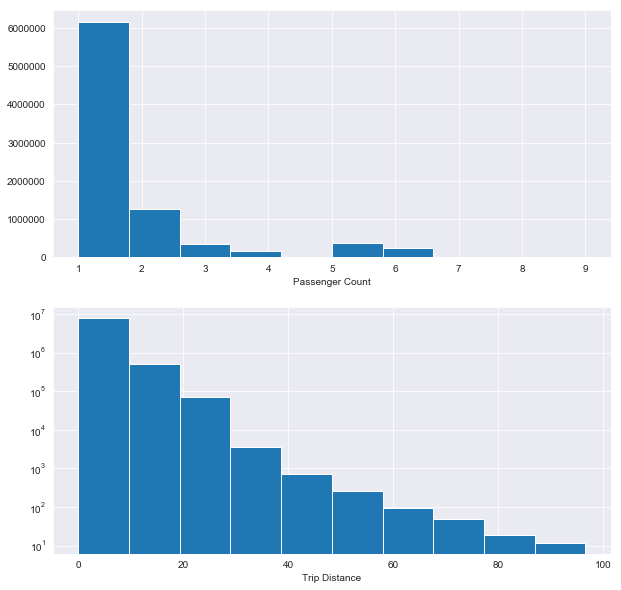

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.xlabel('Passenger Count')
plt.hist(taxi['passenger_count'],bins=10)
plt.subplot(2,1,2)
plt.xlabel('Trip Distance')
plt.hist(taxi['trip_distance'],bins=10)
plt.yscale('log')
plt.show()

In [10]:
taxi.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [11]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

In [26]:
taxi['trip_time'] = (pd.to_numeric(taxi['tpep_dropoff_datetime']) - pd.to_numeric(taxi['tpep_pickup_datetime']))/(1000000000*60)

taxi['trip_time'] = taxi['trip_time'].apply(lambda x: float("{0:.2f}".format(x)))

taxi[['trip_distance','trip_time', 'total_amount']].head()

,trip_distance,trip_time,total_amount
1,1.0,5.00,8.15
2,3.3,15.12,14.30
5,2.0,15.02,15.35
6,1.5,10.47,11.75
7,0.7,3.48,8.15


In [31]:
taxi[[
    'tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','trip_time', 'total_amount'
    ]].sort_values('trip_time', ascending=False).head(100)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,trip_time,total_amount
263567,2018-06-01 20:04:51,2018-06-02 20:04:50,5.30,1439.98,21.30
555754,2018-06-02 19:40:19,2018-06-03 19:40:18,3.12,1439.98,16.80
1176447,2018-06-04 21:18:46,2018-06-05 21:18:44,20.48,1439.97,65.30
2969018,2018-06-11 00:15:46,2018-06-12 00:15:44,1.46,1439.97,10.23
7941354,2018-06-28 06:55:21,2018-06-29 06:55:18,8.72,1439.95,52.56
1972332,2018-06-07 16:33:23,2018-06-08 16:33:17,17.79,1439.90,63.06
4996198,2018-06-18 06:33:29,2018-06-19 06:33:22,14.18,1439.88,42.80
5093956,2018-06-18 12:55:55,2018-06-19 12:55:46,18.72,1439.85,66.00
4710484,2018-06-16 22:42:35,2018-06-17 22:42:26,26.23,1439.85,64.42
1021804,2018-06-04 14:46:20,2018-06-05 14:46:10,6.03,1439.83,58.56


In [34]:
taxi[[
    'tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','trip_time', 'total_amount'
    ]].loc[taxi.trip_time>200]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,trip_time,total_amount
710,2018-06-01 00:27:59,2018-06-02 00:00:00,1.75,1412.02,8.80
759,2018-06-01 00:01:58,2018-06-01 23:56:21,7.57,1434.38,27.09
762,2018-06-01 00:27:06,2018-06-02 00:21:55,1.67,1434.82,10.30
783,2018-06-01 00:14:25,2018-06-02 00:06:20,3.21,1431.92,17.76
1383,2018-05-31 23:35:35,2018-06-01 23:15:28,3.72,1419.88,17.02
1436,2018-06-01 00:54:40,2018-06-02 00:49:49,8.56,1435.15,29.30
2075,2018-05-31 22:04:04,2018-06-01 21:23:19,7.84,1399.25,36.06
2130,2018-06-01 00:33:46,2018-06-02 00:26:59,0.88,1433.22,5.80
2628,2018-06-01 00:15:56,2018-06-02 00:05:24,1.14,1429.47,8.30
4130,2018-06-01 00:03:44,2018-06-02 00:00:33,2.18,1436.82,11.76


In [33]:
print(len(taxi.trip_time.loc[taxi.trip_time>200]))
print(len(taxi.trip_time.loc[taxi.trip_time==0]))

19123
367


In [53]:
taxi = taxi.loc[(taxi.trip_time>0)&
                (taxi.trip_time<300)] # Max out the time of trip at 5 hours

In [54]:
taxi_626 = taxi.loc[(taxi['tpep_pickup_datetime']>'2018-6-26')&(taxi['tpep_pickup_datetime']<'2018-6-27')&
                    (taxi['tpep_dropoff_datetime']>'2018-6-26')&(taxi['tpep_dropoff_datetime']<'2018-6-27')]

taxi_626.sort_values('tpep_pickup_datetime')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour,dayofweek
7267989,1,2018-06-26 00:00:01,2018-06-26 00:09:33,1,1.80,1,N,234,79,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80,9.53,0,1
7270645,2,2018-06-26 00:00:01,2018-06-26 00:06:44,2,2.14,1,N,186,229,1,8.0,0.5,0.5,1.08,0.0,0.3,10.38,6.72,0,1
7257924,2,2018-06-26 00:00:01,2018-06-26 00:18:15,4,7.19,1,N,162,80,1,22.5,0.5,0.5,5.95,0.0,0.3,29.75,18.23,0,1
7261724,2,2018-06-26 00:00:01,2018-06-26 00:09:33,5,2.13,1,N,65,195,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,9.53,0,1
7271693,1,2018-06-26 00:00:01,2018-06-26 00:17:55,1,10.80,1,N,138,54,1,31.0,0.5,0.5,6.45,0.0,0.3,38.75,17.90,0,1
7262024,2,2018-06-26 00:00:02,2018-06-26 00:09:33,1,1.49,1,N,230,170,2,8.5,0.5,0.5,0.00,0.0,0.3,9.80,9.52,0,1
7268049,2,2018-06-26 00:00:02,2018-06-26 00:10:54,1,2.37,1,N,239,230,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,10.87,0,1
7270924,1,2018-06-26 00:00:03,2018-06-26 00:05:36,1,1.40,1,N,237,43,1,7.0,0.5,0.5,2.00,0.0,0.3,10.30,5.55,0,1
7268871,1,2018-06-26 00:00:03,2018-06-26 00:29:40,1,9.60,1,N,68,243,2,32.0,0.5,0.5,0.00,0.0,0.3,33.30,29.62,0,1
7267889,2,2018-06-26 00:00:03,2018-06-26 00:11:24,3,2.03,1,N,230,68,1,10.0,0.5,0.5,2.26,0.0,0.3,13.56,11.35,0,1


In [55]:
taxi.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
trip_time                       float64
hour                              int64
dayofweek                         int64
dtype: object

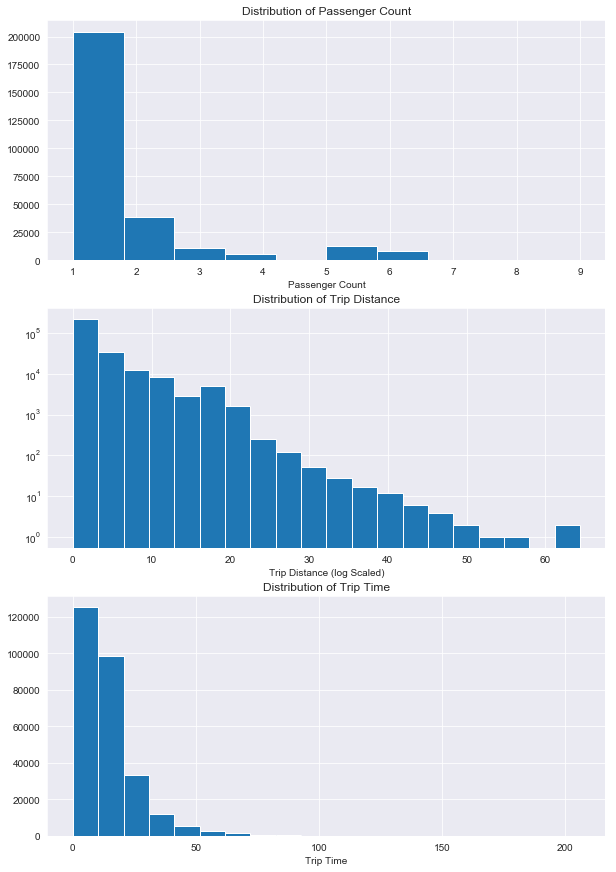

In [56]:
plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.xlabel('Passenger Count')
plt.hist(taxi_626['passenger_count'])
plt.title('Distribution of Passenger Count')
plt.subplot(3,1,2)
plt.xlabel('Trip Distance (log Scaled)')
plt.hist(taxi_626['trip_distance'],bins=20)
plt.title('Distribution of Trip Distance')
plt.yscale('log')
plt.subplot(3,1,3)
plt.xlabel('Trip Time')
plt.hist(taxi_626['trip_time'],bins=20)
plt.title('Distribution of Trip Time')
plt.show()

In [57]:
taxi_626['hour'] = taxi_626.tpep_pickup_datetime.dt.hour

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
hourly_list = []
for i in range(24):
    new_row = []
    new_row.append(i)
    new_row.append(len(taxi_626.trip_distance.loc[taxi_626.hour == i]))
    new_row.append(taxi_626.trip_distance.loc[taxi_626.hour == i].mean())
    new_row.append(taxi_626.trip_distance.loc[taxi_626.hour == i].std())
    new_row.append(taxi_626.passenger_count.loc[taxi_626.hour == i].mean())
    new_row.append(taxi_626.passenger_count.loc[taxi_626.hour == i].std())
    new_row.append(taxi_626.trip_time.loc[taxi_626.hour == i].mean())
    
    single_passengers = taxi_626.passenger_count.loc[(taxi_626.hour == i)&(taxi_626.passenger_count==1)]
    new_row.append(len(single_passengers)/len(taxi_626.trip_distance.loc[taxi_626.hour == i]))
    
    hourly_list.append(new_row)

hourly = pd.DataFrame(hourly_list, columns=['hour','count','mean_dist','std_dist','mean_passenger','std_passenger', 'mean_time','single_passenger_perc'])
hourly    

,hour,count,mean_dist,std_dist,mean_passenger,std_passenger,mean_time,single_passenger_perc
0,0,6036,3.755603,4.056229,1.608847,1.238133,11.921168,0.721173
1,1,3219,3.737959,4.097144,1.608885,1.247818,11.190848,0.727244
2,2,1843,3.563266,3.911155,1.578947,1.180566,10.570038,0.730331
3,3,1172,4.148515,4.538169,1.617747,1.241453,11.668515,0.717577
4,4,1566,4.511079,4.749620,1.515964,1.182703,11.795658,0.768199
5,5,3126,4.093570,5.042711,1.517914,1.219901,10.908049,0.778631
6,6,7907,3.217063,4.205556,1.544075,1.250519,11.128522,0.774251
7,7,12070,2.845165,3.642989,1.536123,1.240683,12.953101,0.775725
8,8,15047,2.599799,3.225396,1.560377,1.255717,14.737407,0.762810
9,9,14384,2.698626,3.477380,1.562570,1.254560,16.111759,0.759872


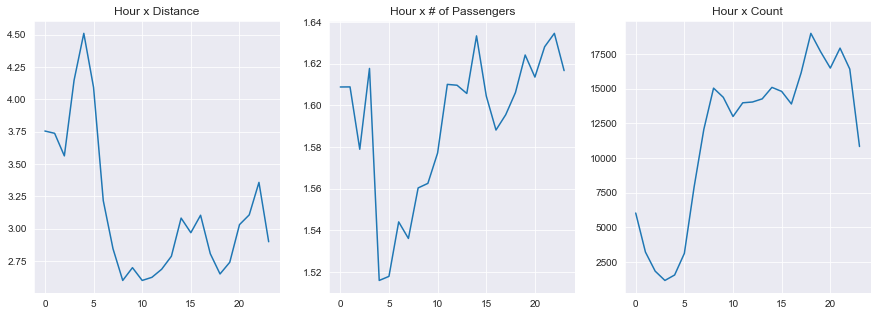

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(hourly.hour, hourly.mean_dist)
plt.title('Hour x Distance')

plt.subplot(1,3,2)
plt.plot(hourly.hour, hourly.mean_passenger)
plt.title('Hour x # of Passengers')

plt.subplot(1,3,3)
plt.plot(hourly.hour, hourly['count'])
plt.title('Hour x Count')
plt.show()

In [60]:
taxi['hour'] = taxi.tpep_pickup_datetime.dt.hour
taxi['dayofweek'] = taxi.tpep_pickup_datetime.dt.dayofweek

In [61]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_time,hour,dayofweek
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,5.00,0,4
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,15.12,0,4
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.0,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35,15.02,0,4
6,1,2018-06-01 00:02:33,2018-06-01 00:13:01,2,1.5,1,N,163,233,1,8.5,0.5,0.5,1.95,0.0,0.3,11.75,10.47,0,4
7,1,2018-06-01 00:13:23,2018-06-01 00:16:52,1,0.7,1,N,186,246,1,5.0,0.5,0.5,1.85,0.0,0.3,8.15,3.48,0,4


In [62]:
taxi.dayofweek.unique()

array([4, 3, 5, 2, 6, 0, 1])

In [69]:
day_list = []

for i in range(7):
    new_row = []
    new_row.append(i)
    new_row.append(len(taxi.trip_distance.loc[taxi.dayofweek == i]))
    new_row.append(taxi.trip_distance.loc[taxi.dayofweek == i].mean())
    new_row.append(taxi.trip_distance.loc[taxi.dayofweek == i].std())
    new_row.append(taxi.passenger_count.loc[taxi.dayofweek == i].mean())
    new_row.append(taxi.passenger_count.loc[taxi.dayofweek == i].std())
    new_row.append(taxi.trip_time.loc[taxi.dayofweek == i].mean())
    
    single_passengers = taxi.passenger_count.loc[(taxi.dayofweek == i)&(taxi.passenger_count==1)]
    new_row.append(len(single_passengers)/len(taxi.trip_distance.loc[taxi.dayofweek == i]))
    
    day_list.append(new_row)

daily = pd.DataFrame(day_list, columns=['dayofweek','count','mean_dist','std_dist','mean_passenger','std_passenger','mean_time','single_passenger_perc'])
daily

,dayofweek,count,mean_dist,std_dist,mean_passenger,std_passenger,mean_time,single_passenger_perc
0,0,1088245,3.137191,4.061419,1.588972,1.232713,14.314873,0.730676
1,1,1160032,2.935886,3.719120,1.587425,1.235933,14.958218,0.733531
2,2,1213181,2.927829,3.692455,1.588155,1.235958,15.381158,0.733166
3,3,1226379,2.984095,3.801764,1.588501,1.231498,16.211741,0.731376
4,4,1487964,3.003541,3.843165,1.602250,1.230129,15.308508,0.720013
5,5,1399709,2.920188,3.620590,1.668713,1.262818,13.185457,0.683282
6,6,989145,3.367203,4.192490,1.656655,1.259708,13.851866,0.691082


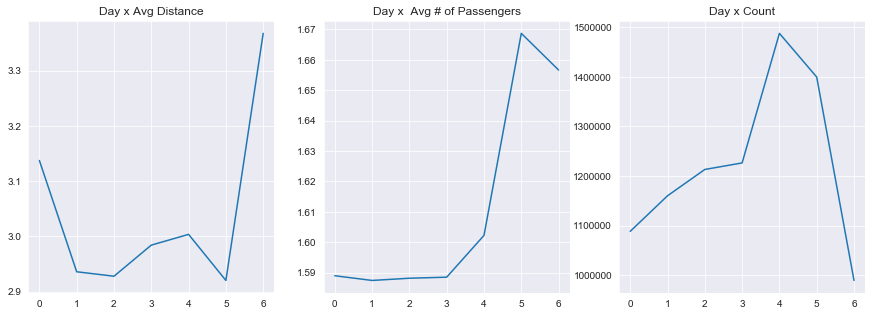

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(daily.dayofweek, daily.mean_dist)
plt.title('Day x Avg Distance')

plt.subplot(1,3,2)
plt.plot(daily.dayofweek, daily.mean_passenger)
plt.title('Day x  Avg # of Passengers')

plt.subplot(1,3,3)
plt.plot(daily.dayofweek, daily['count'])
plt.title('Day x Count')
plt.show()

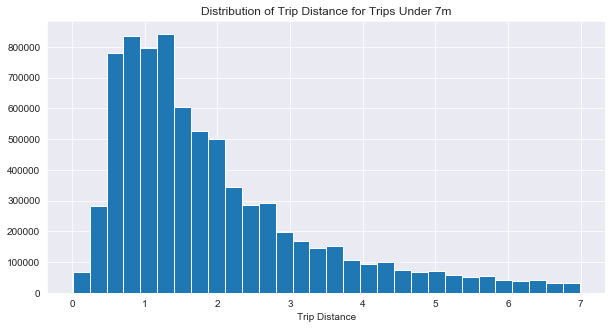

In [65]:
under_7 = taxi.loc[taxi.trip_distance < 7]

plt.figure(figsize=(10,5))
plt.xlabel('Trip Distance')
plt.hist(under_7['trip_distance'],bins=30)
plt.title('Distribution of Trip Distance for Trips Under 7m')
plt.show()

In [138]:
print('{}% of rides are under 7 miles long'.format((len(under_7)/len(taxi)*100)))

89.64890571509986% of rides are under 7 miles long


____

### Very Simple Linear Model

In [43]:
taxi_model = taxi_626
taxi_model['tpep_pickup_datetime'] = pd.to_numeric(taxi_model['tpep_pickup_datetime'])
taxi_model['tpep_dropoff_datetime'] = pd.to_numeric(taxi_model['tpep_dropoff_datetime'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# Just a quick check to see if there is a linear relationship
X = taxi_model[['tpep_pickup_datetime','tpep_dropoff_datetime']]
Y = taxi_model['total_amount']
lm.fit(X, Y)
lm.score(X, Y)

0.6202461893806734